# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | pontian kecil
Processing Record 3 of Set 1 | tura
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | norman wells
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | kota kinabalu
Processing Record 9 of Set 1 | poum
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | port lincoln
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | kruisfontein
Processing Record 14 of Set 1 | turayf
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | ndele
Processing Record 18 of Set 1 | kangaatsiaq
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | pevek
Processing Record 22 of Set 1 | nanakuli
Processing Record 23 of Set 1 | banda ac

Processing Record 38 of Set 4 | atar
Processing Record 39 of Set 4 | los llanos de aridane
Processing Record 40 of Set 4 | san carlos
Processing Record 41 of Set 4 | inhambane
Processing Record 42 of Set 4 | aktau
Processing Record 43 of Set 4 | kaitangata
Processing Record 44 of Set 4 | alpena
Processing Record 45 of Set 4 | nouna
Processing Record 46 of Set 4 | filadelfia
Processing Record 47 of Set 4 | ahipara
Processing Record 48 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 49 of Set 4 | slave lake
Processing Record 0 of Set 5 | sola
Processing Record 1 of Set 5 | half moon bay
Processing Record 2 of Set 5 | marsh harbour
Processing Record 3 of Set 5 | porto walter
Processing Record 4 of Set 5 | palmer
Processing Record 5 of Set 5 | nouadhibou
Processing Record 6 of Set 5 | bethel
Processing Record 7 of Set 5 | hvide sande
Processing Record 8 of Set 5 | cumaribo
City not found. Skipping...
Processing Record 9 of Set 5 | hithadhoo
Processing Record 10 of Set 5

Processing Record 27 of Set 8 | san jose
Processing Record 28 of Set 8 | vanavara
Processing Record 29 of Set 8 | san juan
Processing Record 30 of Set 8 | taunggyi
Processing Record 31 of Set 8 | bilibino
Processing Record 32 of Set 8 | zabaykalsk
Processing Record 33 of Set 8 | besikduzu
Processing Record 34 of Set 8 | langxiang
Processing Record 35 of Set 8 | miranorte
City not found. Skipping...
Processing Record 36 of Set 8 | juan lacaze
Processing Record 37 of Set 8 | de aar
Processing Record 38 of Set 8 | krasnogorsk
Processing Record 39 of Set 8 | richards bay
Processing Record 40 of Set 8 | egvekinot
Processing Record 41 of Set 8 | marang
Processing Record 42 of Set 8 | edson
Processing Record 43 of Set 8 | ferzikovo
Processing Record 44 of Set 8 | kollumerland
City not found. Skipping...
Processing Record 45 of Set 8 | yulara
Processing Record 46 of Set 8 | belaya gora
Processing Record 47 of Set 8 | winnemucca
Processing Record 48 of Set 8 | comodoro rivadavia
Processing Reco

Processing Record 12 of Set 12 | faya
Processing Record 13 of Set 12 | temaraia
City not found. Skipping...
Processing Record 14 of Set 12 | lalsk
Processing Record 15 of Set 12 | strezhevoy
Processing Record 16 of Set 12 | duluth
Processing Record 17 of Set 12 | srandakan
Processing Record 18 of Set 12 | aklavik
Processing Record 19 of Set 12 | alice springs
Processing Record 20 of Set 12 | ugoofaaru
Processing Record 21 of Set 12 | launceston
Processing Record 22 of Set 12 | karimpur
Processing Record 23 of Set 12 | sangar
Processing Record 24 of Set 12 | hualmay
Processing Record 25 of Set 12 | giengen
City not found. Skipping...
Processing Record 26 of Set 12 | tanggul
Processing Record 27 of Set 12 | shawnee
Processing Record 28 of Set 12 | zhigansk
Processing Record 29 of Set 12 | havre-saint-pierre
Processing Record 30 of Set 12 | harper
Processing Record 31 of Set 12 | amapa
Processing Record 32 of Set 12 | pemberton
Processing Record 33 of Set 12 | tezu
Processing Record 34 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,277.92,70,20,0.00,US,1680017058
1,pontian kecil,1.4801,103.3899,299.33,89,7,3.75,MY,1680017064
2,tura,25.5198,90.2201,295.35,40,7,1.91,IN,1680017064
3,hilo,19.7297,-155.0900,295.53,93,40,2.24,US,1680016970
4,norman wells,65.2820,-126.8329,270.17,93,100,0.00,CA,1680017064


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,277.92,70,20,0.00,US,1680017058
1,pontian kecil,1.4801,103.3899,299.33,89,7,3.75,MY,1680017064
2,tura,25.5198,90.2201,295.35,40,7,1.91,IN,1680017064
3,hilo,19.7297,-155.0900,295.53,93,40,2.24,US,1680016970
4,norman wells,65.2820,-126.8329,270.17,93,100,0.00,CA,1680017064


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

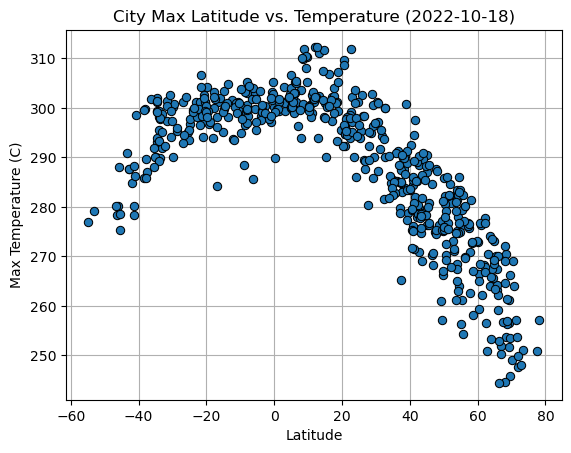

In [8]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"],
         city_data_df["Max Temp"],
         linestyle="none",
         marker="o",
         markeredgecolor="black",
         markeredgewidth="0.75")
         
        
        

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

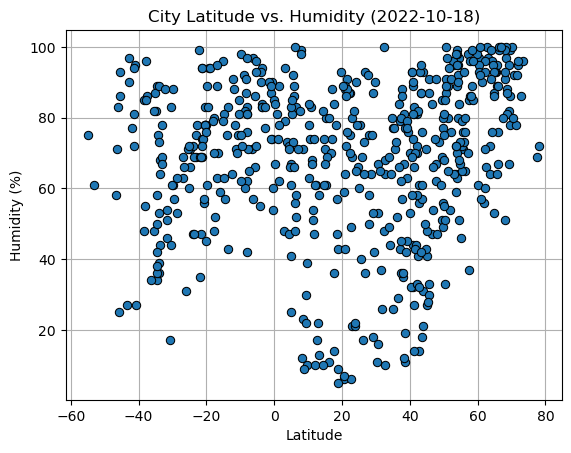

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.plot(city_data_df["Lat"],
         city_data_df["Humidity"],
         linestyle="none",
         marker="o",
         markeredgecolor="black",
         markeredgewidth="0.75")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

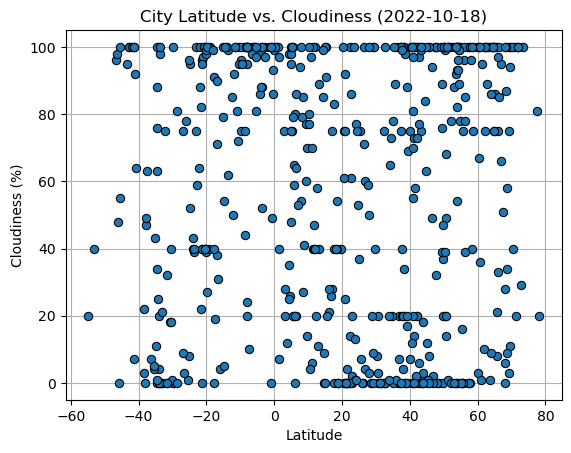

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.plot(city_data_df["Lat"],
         city_data_df["Cloudiness"],
         linestyle="none",
         marker="o",
         markeredgecolor="black",
         markeredgewidth="0.75")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

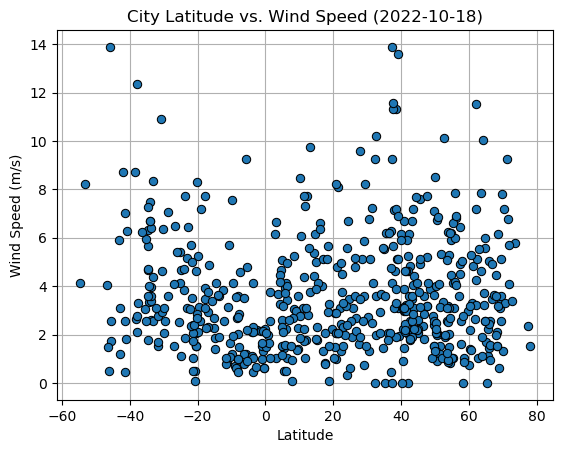

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.plot(city_data_df["Lat"],
         city_data_df["Wind Speed"],
         linestyle="none",
         marker="o",
         markeredgecolor="black",
         markeredgewidth="0.75")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def regression_linear(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    values_regress = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,values_regress, "r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red" )
    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()
 

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,277.92,70,20,0.00,US,1680017058
1,pontian kecil,1.4801,103.3899,299.33,89,7,3.75,MY,1680017064
2,tura,25.5198,90.2201,295.35,40,7,1.91,IN,1680017064
3,hilo,19.7297,-155.0900,295.53,93,40,2.24,US,1680016970
4,norman wells,65.2820,-126.8329,270.17,93,100,0.00,CA,1680017064


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,rikitea,-23.1203,-134.9692,299.76,75,100,5.17,PF,1680017064
8,poum,-20.2333,164.0167,299.51,78,39,8.29,NC,1680017065
10,port lincoln,-34.7333,135.8667,290.05,82,11,6.33,AU,1680017065
11,lebu,-37.6167,-73.6500,286.97,86,63,3.32,CL,1680017066
12,kruisfontein,-34.0033,24.7314,298.09,39,100,7.46,ZA,1680017066


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8019696490003676


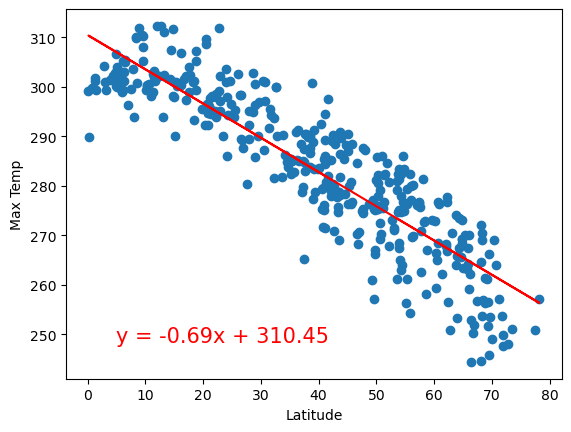

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

regression_linear(x_values, y_values, 0.1, 0.1)

The r-value is: 0.3926310751073193


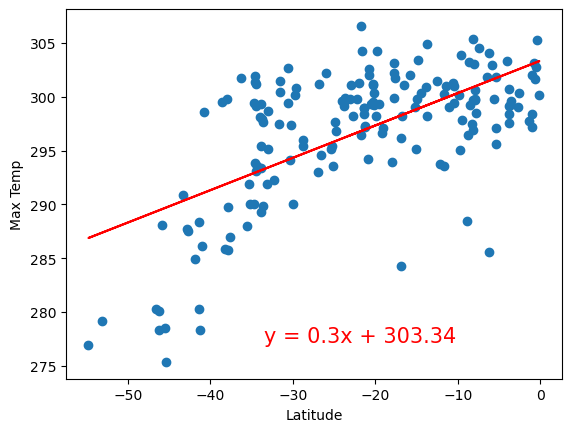

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

regression_linear(x_values, y_values, 0.4, 0.1)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

# Discussion about the linear relationship:

# Northern Hemisphere:


# The relationship between latitude and max temperature shows there is a strong negative correlation


# The r-value is roughly around 0.9

# The max temperature drops while the latitude is increasing



# Southern Hemisphere:

# There seems to be no correlation between latitude and Max temperature

# The r-value is roughly around 0.40

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10732573161274907


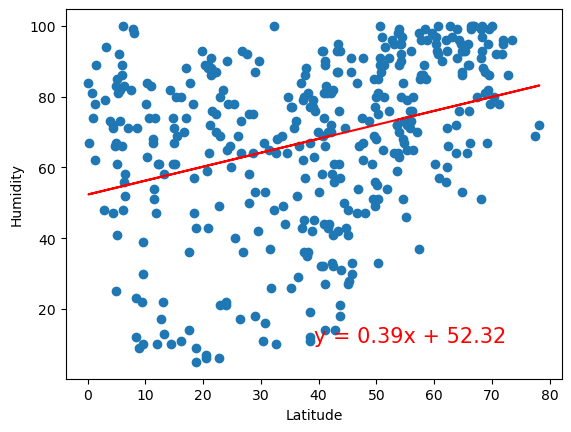

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

regression_linear(x_values, y_values, 0.5, 0.1)


The r-value is: 0.07732984207009197


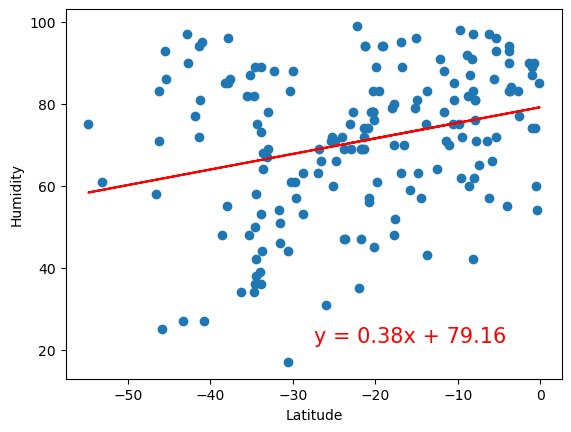

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

regression_linear(x_values, y_values, 0.5, 0.1)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

# Discussion about the linear relationship:

# Northern Hemisphere:

# No Correlation between latitude and humidity

# r-value is around 0.11


# Southern Hemisphere:

# No correlation between latitude and humidity

# r-value is around 0.1

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.020484789391450986


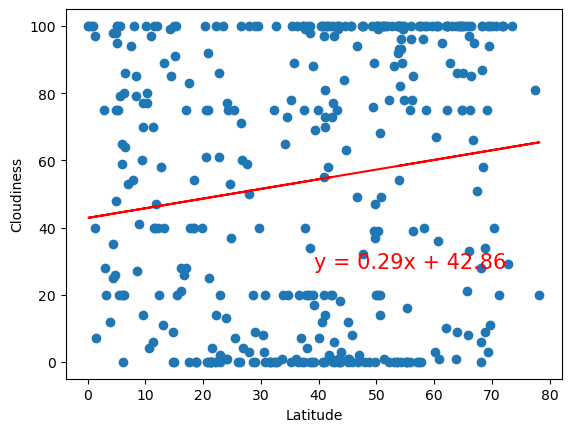

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

regression_linear(x_values, y_values, 0.5, 0.3)



The r-value is: 0.14739442942692543


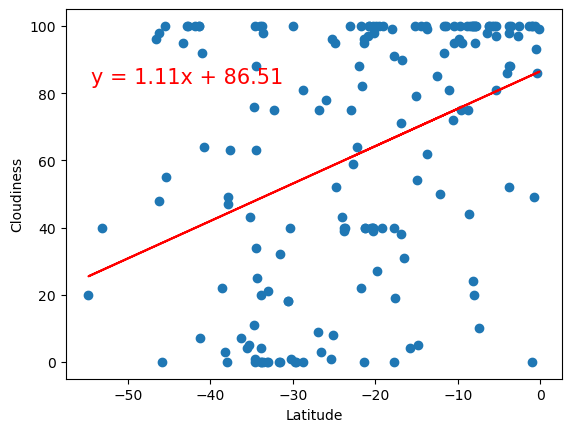

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

regression_linear(x_values, y_values, 0.05, 0.8)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

# Discussion about the linear relationship:

# Northern Hemisphere:

# There is no correlation between cloudiness and latitude

# r-value is around 0.02

# Southern Hemisphere:

# No correlation between cloudiness and latitude

# r-value is around 0.15

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0040683404664209125


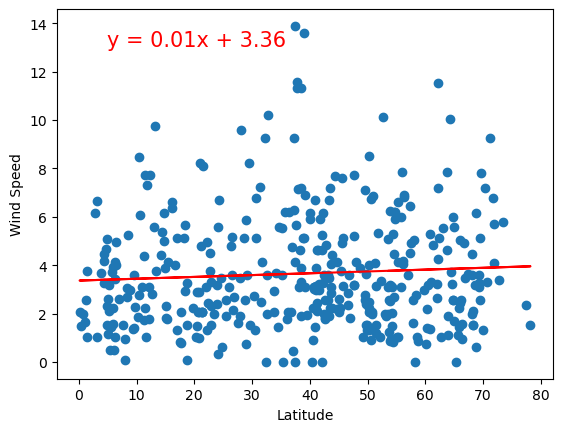

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

regression_linear(x_values, y_values)



The r-value is: 0.15941514539443688


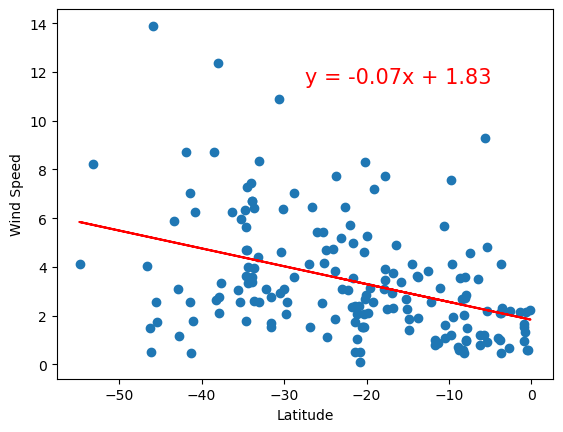

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

regression_linear(x_values, y_values, 0.5, 0.8)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

# Discussion about the linear relationship:

# Northern Hemisphere:


# There is no correlation between Latitude and the wind speed

# r- value is around 0.004


# Southern Hemisphere:

# There is no correlation between Latitude and Wind Speed

# r-value is around 0.16